# Day (1982) Example IV
## Model
One of the limitations of the Solow model is that growth is not a smooth and continuous process. As a matter of fact, recessions and irregular growth cycles are at the core of the mechanism of economic development. In order to account for such irregularities, Day (1982) takes the theoretical framework developed by Solow and extends it by incorporating into the model insights from the so-called Chaos Theory. As a consequence, oscillating behaviours and chaotic patterns arise.

Suppose that the saving rate is no longer exogenous but depends positively on the interest rate such that saving function $s(k)$ becomes:

$$s(k_t)=q\Big{(}1-\frac{c}{r_t}\Big{)}\frac{k_t}{y_t}$$

where $q$ and $c$ are exogenous parameters whereas $r_t$ is the interest rate at time $t$ that, under the assumption of competitive markets and Cobb-Douglas production function, is given by 

$$r_t=\alpha \frac{y_t}{k_t}$$

Furthermore, assume that the law of motion of capital takes the following form:

$$k_{t+1}=\frac{min [ (1+\rho) k_{t}, \ s(k_t)y_t ] }{1+n}$$

where $\rho$ is the maximal growth rate of capital. Day (1957) proposes several explanations why such a limitation may arise, including behavioural reasons or possible costs of adjustment.

## Code
Choose   $k_0$   such that   $k_0<(\alpha A/c)^{\frac{1}{1-\alpha}}$   otherwise a solution may fail to exist.

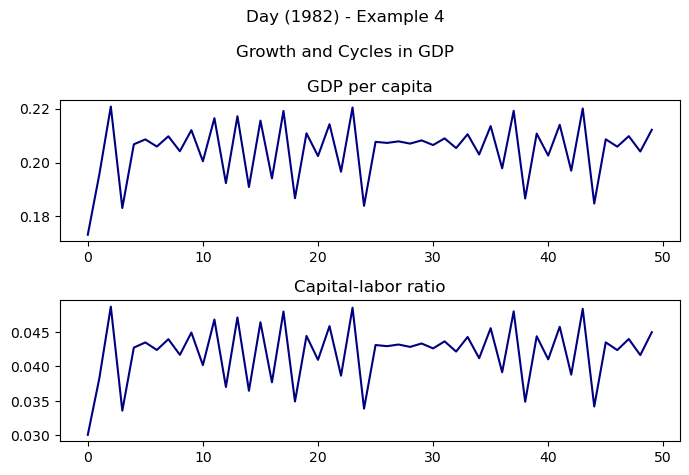

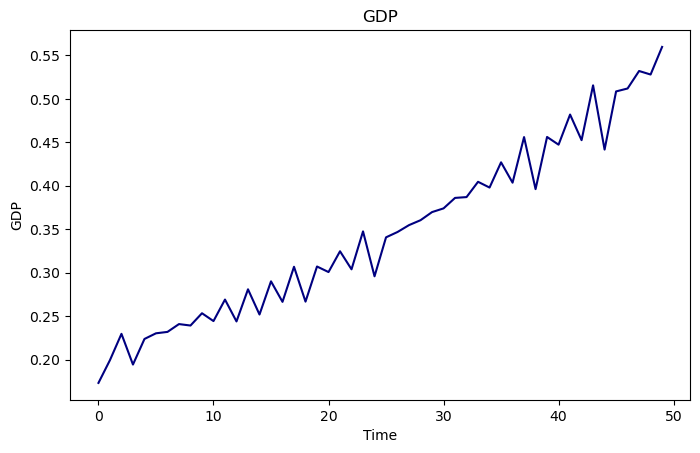

In [1]:
from matplotlib import pyplot as plt

L_0=1       # Initial Population
A=1         # Technology level
t=50        # Time periods
a=0.5       # Capital Income Share
n=0.02      # Population Growth Rate

rho=0.3     #  maximal potential growth rate
q=6         # constant 1 in the saving function
c=A*2       # constant 2 in the saving function


k_0=0.03  # Initial capital labor ratio (must be between 0 and (a*A/c)**(1/(1-a)) )


print()
    
# Define a function that returns a sequence containing the values for each period for variables that grow at a constant rate
def time_series(x_0, growth_rate, t):
    x=[]
    for i in range(t):
        if i==0:
            x_t=x_0
        else:
            x_t=x_0*(1+growth_rate)**i
        x.append(x_t)
    
    return x

# Create saving function
def s(q, c, r_t,k_t,y_t):
    return q*(1-c/r_t)*k_t/y_t


#Define Law of motion of capital
def g(q, c, r_t,k_t,y_t):
    return min((1+rho)*k_t,S_t*y_t)/(1+n)


# Compute the sequences of values of population and time for each period

L=time_series(L_0,n,t)
T=[i for i in range(t)]


# Compute variables in per capita terms
try:
    k=[]
    y=[]
    for i in range(t):
        if i==0:
            k_t=k_0
            y_t=A*k_0**a
        else:
            r_t=a*y_t/k_t
            S_t=s(q, c, r_t,k_t,y_t)
            k_t= g(q, c, r_t,k_t,y_t)
            y_t=A*k_t**a
            
        k.append(k_t)
        y.append(y_t)

    Y=[y[i]*L[i] for i in range(t)]


    #Graphs

    fig, axs = plt.subplots(3,1, gridspec_kw={'hspace':0.3},height_ratios=[1,1,2])

    fig.set_figwidth(7)
    fig.set_figheight(12)

    fig.suptitle("Day (1982) - Example 4\n"+"\n"+'Growth and Cycles in GDP\n\n')


    axs[0].plot(T, y, color="navy")
    axs[0].set_title('GDP per capita')
    axs[0].set_ylabel(r'$y$')
    axs[0].set_xlabel('Time')


    axs[1].plot(T, k, color="navy")
    axs[1].set_title('Capital-labor ratio')
    axs[1].set_ylabel(r'$k$')
    axs[1].set_xlabel('Time')



    axs[2].plot(T, Y, color="navy")
    axs[2].set_xlabel('Time')
    axs[2].set_title('GDP')
    axs[2].set_ylabel('GDP')

    plt.show()

except Exception as e:
    if k_0 > (a*A/c)**(1/(1-a)):
        print("k_0 does not take an acceptable value\n\nPlease insert a value between 0 and",(a*A/c)**(1/(1-a)))
    else:
        print(e)
    
